# Train model using Multinomial Naive Bayes

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#  Load the cleaned dataset
df = pd.read_csv(r"C:\Users\hp\Desktop\Projects\Fake_news_detection\data\cleaned_news.csv")
df = df.dropna(subset=['clean_text'])

#  TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#  Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f" Accuracy:  {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall:    {recall:.4f}")
print(f" F1 Score:  {f1:.4f}")


 Accuracy:  0.9845
 Precision: 0.9868
 Recall:    0.9815
 F1 Score:  0.9841


In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train the model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict
nb_pred = nb_model.predict(X_test)

# Evaluate
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred)

print(" Multinomial Naive Bayes Evaluation:")
print(f"Accuracy:  {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall:    {nb_recall:.4f}")
print(f"F1 Score:  {nb_f1:.4f}")


 Multinomial Naive Bayes Evaluation:
Accuracy:  0.9381
Precision: 0.9317
Recall:    0.9425
F1 Score:  0.9371


confusion_matrix

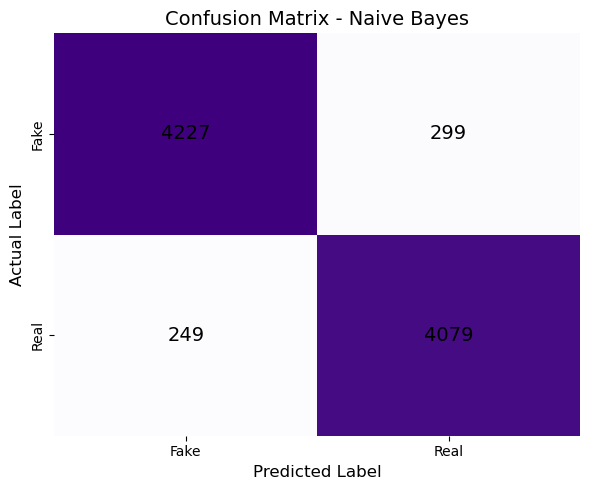

In [5]:
nb_cm = confusion_matrix(y_test, nb_pred)
labels = ['Fake', 'Real']

plt.figure(figsize=(6, 5))
ax = sns.heatmap(nb_cm, annot=False, cmap='Purples', xticklabels=labels, yticklabels=labels, cbar=False)

for i in range(nb_cm.shape[0]):
    for j in range(nb_cm.shape[1]):
        ax.text(j + 0.5, i + 0.5, nb_cm[i, j], ha='center', va='center', color='black', fontsize=14)

ax.set_title("Confusion Matrix - Naive Bayes", fontsize=14)
ax.set_xlabel("Predicted Label", fontsize=12)
ax.set_ylabel("Actual Label", fontsize=12)
plt.tight_layout()
plt.show()


ROC curve

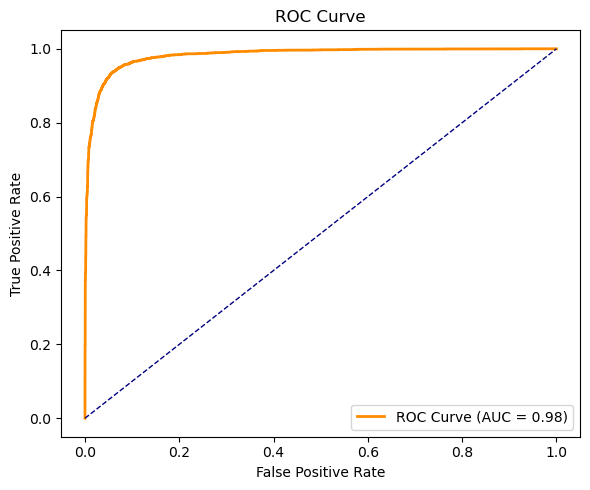

In [6]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_proba = nb_model.predict_proba(X_test)[:, 1]

# ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


Word Cloud

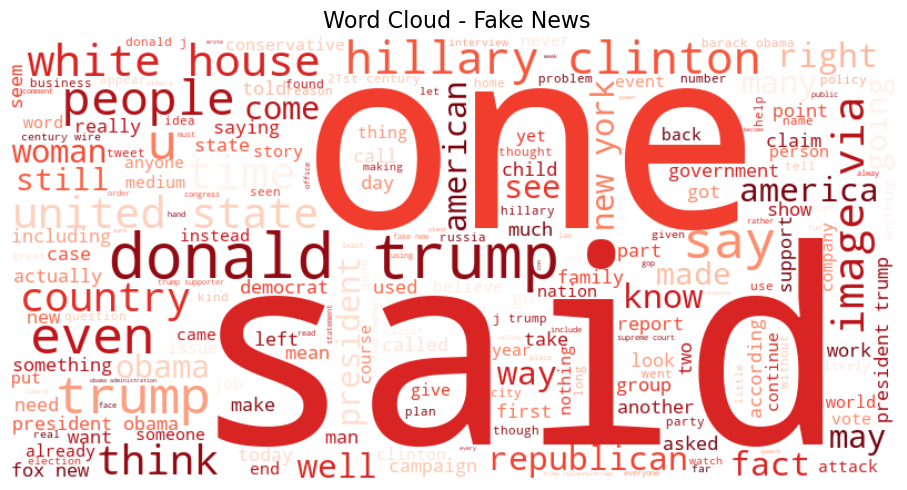

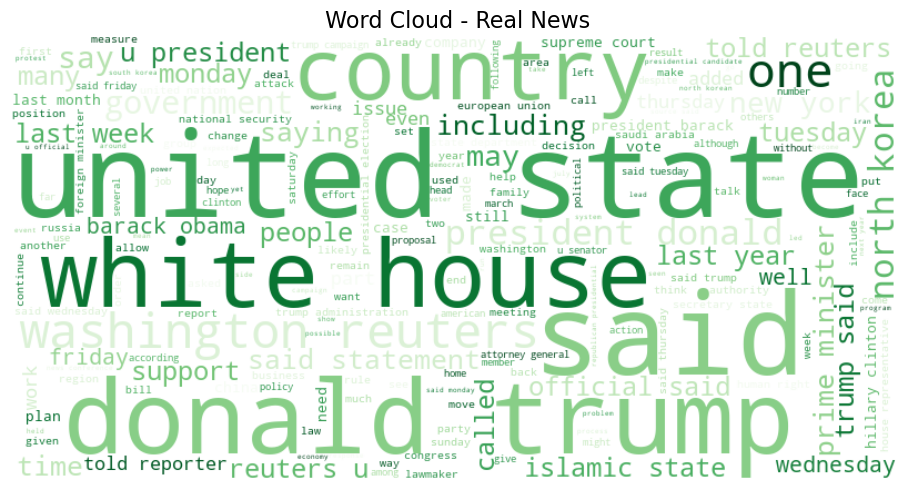

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create separate text blobs for each class
fake_text = " ".join(df[df['label'] == 0]['clean_text'])
real_text = " ".join(df[df['label'] == 1]['clean_text'])

#  Word cloud for fake news (red tint)
wc_fake = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(fake_text)

plt.figure(figsize=(10, 5))
plt.imshow(wc_fake, interpolation='bilinear')
plt.axis('off')
plt.title(" Word Cloud - Fake News", fontsize=16)
plt.tight_layout()
plt.show()

#  Word cloud for real news (green tint)
wc_real = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(real_text)

plt.figure(figsize=(10, 5))
plt.imshow(wc_real, interpolation='bilinear')
plt.axis('off')
plt.title(" Word Cloud - Real News", fontsize=16)
plt.tight_layout()
plt.show()
